# Library imports

In [1]:
import tensorflow
import numpy
import IPython
from matplotlib import pyplot
import cv2
import PIL
import os
import random
import pickle
import keras
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import plot_model
import seaborn
# %matplotlib qt
%matplotlib inline

# Data imports

In [2]:
classes_list=['Facial acne', 'Melanoma', 'Psoriasis', 'Ringworm', 'Skin Burn']
def printClassList():
    for class_name in classes_list:
        print(f"{classes_list.index(class_name)} -->  {class_name}")
printClassList()   
def getClassvalue(index):
    print(classes_list[index])

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm
4 -->  Skin Burn


In [3]:
loaded_pickle_features=open("../Data/objects/pickle_fetures.pickle","rb")
Training_Features=pickle.load(loaded_pickle_features)
loaded_pickle_features.close()
loaded_pickle_labels=open("../Data/objects/pickle_labels.pickle","rb")
Training_Labels=pickle.load(loaded_pickle_labels)
loaded_pickle_labels.close()

In [4]:
loaded_pickle_testing_features=open("../Data/objects/pickle_testing_fetures.pickle","rb")
Testing_Features=pickle.load(loaded_pickle_testing_features)
loaded_pickle_testing_features.close()
loaded_pickle_testing_labels=open("../Data/objects/pickle_testing_labels.pickle","rb")
Testing_Labels=pickle.load(loaded_pickle_testing_labels)
loaded_pickle_testing_labels.close()

In [5]:
Testing_Features

array([[[0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.90980392,
         0.90980392, 0.92156863],
        ...,
        [0.97254902, 0.92156863, 0.82745098, ..., 0.99607843,
         0.99607843, 1.        ],
        [0.98431373, 0.87843137, 0.76862745, ..., 1.        ,
         1.        , 0.99607843],
        [0.99607843, 0.97647059, 0.95686275, ..., 0.99607843,
         0.99607843, 1.        ]],

       [[0.78039216, 0.78431373, 0.78823529, ..., 0.18823529,
         0.16862745, 0.16078431],
        [0.78431373, 0.78823529, 0.79215686, ..., 0.18823529,
         0.17254902, 0.16862745],
        [0.78431373, 0.78823529, 0.8       , ..., 0.18039216,
         0.16862745, 0.16078431],
        ...,
        [0.02745098, 0.01960784, 0.01960784, ..., 0.17254902,
         0.22352941, 0.23529412],
        [0.0

In [6]:
Training_Labels

[0,
 1,
 3,
 2,
 4,
 0,
 3,
 0,
 2,
 1,
 1,
 3,
 0,
 3,
 3,
 1,
 0,
 3,
 0,
 2,
 0,
 0,
 3,
 0,
 3,
 4,
 3,
 1,
 3,
 0,
 3,
 1,
 3,
 4,
 0,
 3,
 0,
 4,
 1,
 3,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 1,
 1,
 1,
 0,
 3,
 0,
 0,
 1,
 3,
 3,
 4,
 0,
 3,
 3,
 2,
 0,
 2,
 2,
 0,
 0,
 3,
 2,
 4,
 0,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 0,
 0,
 1,
 1,
 1,
 4,
 2,
 1,
 3,
 1,
 0,
 4,
 2,
 0,
 3,
 0,
 3,
 4,
 3,
 0,
 1,
 3,
 0,
 3,
 0,
 0,
 2,
 3,
 0,
 0,
 2,
 3,
 3,
 2,
 1,
 3,
 3,
 3,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 0,
 1,
 0,
 2,
 3,
 3,
 0,
 3,
 3,
 2,
 3,
 4,
 0,
 0,
 2,
 2,
 1,
 3,
 2,
 1,
 1,
 2,
 0,
 0,
 2,
 3,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 3,
 0,
 2,
 3,
 3,
 2,
 0,
 4,
 0,
 3,
 1,
 3,
 0,
 0,
 3,
 1,
 0,
 3,
 0,
 1,
 3,
 1,
 2,
 3,
 2,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 4,
 2,
 1,
 0,
 3,
 0,
 3,
 2,
 0,
 0,
 2,
 0,
 0,
 3,
 1,
 3,
 2,
 0,
 3,
 0,
 0,
 2,
 3,
 1,
 2,
 3,
 1,
 4,
 1,
 0,
 1,
 0,
 4,
 1,
 1,
 2,
 0,
 0,
 2,
 3,
 3,
 0,
 1,
 2,
 2,
 0,
 4,
 3,
 1,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 3,


In [7]:
Testing_Features

array([[[0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.91372549,
         0.91372549, 0.9254902 ],
        [0.96862745, 0.96862745, 0.96862745, ..., 0.90980392,
         0.90980392, 0.92156863],
        ...,
        [0.97254902, 0.92156863, 0.82745098, ..., 0.99607843,
         0.99607843, 1.        ],
        [0.98431373, 0.87843137, 0.76862745, ..., 1.        ,
         1.        , 0.99607843],
        [0.99607843, 0.97647059, 0.95686275, ..., 0.99607843,
         0.99607843, 1.        ]],

       [[0.78039216, 0.78431373, 0.78823529, ..., 0.18823529,
         0.16862745, 0.16078431],
        [0.78431373, 0.78823529, 0.79215686, ..., 0.18823529,
         0.17254902, 0.16862745],
        [0.78431373, 0.78823529, 0.8       , ..., 0.18039216,
         0.16862745, 0.16078431],
        ...,
        [0.02745098, 0.01960784, 0.01960784, ..., 0.17254902,
         0.22352941, 0.23529412],
        [0.0

In [8]:
Testing_Labels

[3,
 4,
 3,
 2,
 0,
 3,
 2,
 0,
 1,
 1,
 3,
 0,
 0,
 0,
 2,
 1,
 2,
 3,
 2,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 1,
 3,
 4,
 4,
 3,
 2,
 3,
 2,
 1,
 3,
 1,
 1,
 2,
 4,
 1,
 2,
 3,
 1,
 2,
 2,
 3,
 1,
 4,
 1,
 1,
 2,
 3,
 3,
 2,
 4,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 1,
 2,
 3,
 1,
 2,
 0,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 0,
 3,
 1,
 1,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 4,
 3,
 3,
 2,
 2,
 1,
 4,
 2,
 2,
 2,
 3,
 4,
 1,
 2,
 0,
 3,
 1,
 3,
 0,
 3]

In [9]:
Training_Features.shape

(656, 180, 180)

In [10]:
Testing_Features.shape

(119, 180, 180)

In [11]:
len(Training_Labels)

656

In [12]:
len(Testing_Labels)

119

In [13]:
Training_Features[0].shape

(180, 180)

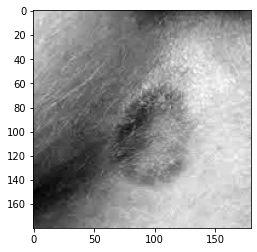

In [14]:
pyplot.imshow(Training_Features[2],cmap='gray')

In [15]:
printClassList()

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm
4 -->  Skin Burn


## Validation Data Creation

In [16]:
# Validation_Features=Training_Features[:10]
# Training_Features=Training_Features[10:]
# Validation_Labels=Training_Labels[:10]
# Training_Labels=Training_Labels[10:]

In [100]:
Validation_Features

array([[[[ 63],
         [ 86],
         [ 78],
         ...,
         [140],
         [137],
         [145]],

        [[ 62],
         [ 75],
         [ 61],
         ...,
         [144],
         [152],
         [180]],

        [[ 61],
         [ 71],
         [ 62],
         ...,
         [137],
         [139],
         [145]],

        ...,

        [[ 85],
         [ 81],
         [ 90],
         ...,
         [160],
         [187],
         [173]],

        [[ 84],
         [ 88],
         [ 88],
         ...,
         [157],
         [162],
         [169]],

        [[ 82],
         [ 81],
         [ 89],
         ...,
         [153],
         [160],
         [162]]],


       [[[147],
         [148],
         [148],
         ...,
         [115],
         [115],
         [117]],

        [[147],
         [148],
         [148],
         ...,
         [113],
         [114],
         [112]],

        [[147],
         [148],
         [148],
         ...,
         [114],
         [

In [101]:
Validation_Labels

[1, 3, 2, 0, 2, 2, 1, 4, 0, 0]

In [17]:
Training_Features.shape

(656, 180, 180)

In [18]:
len(Training_Labels)

656

In [104]:
Validation_Features.shape

(10, 180, 180, 1)

In [105]:
len(Validation_Labels)

10

## Dimention expansion

In [19]:
Training_Features=numpy.expand_dims(Training_Features,axis=-1)
Testing_Features=numpy.expand_dims(Testing_Features,axis=-1)
# Validation_Features=numpy.expand_dims(Validation_Features,axis=-1)

In [20]:
Training_Features.shape

(656, 180, 180, 1)

In [21]:
Testing_Features.shape

(119, 180, 180, 1)

In [143]:
# Validation_Features.shape

In [23]:
len(Training_Labels)

656

In [24]:
len(Testing_Labels)

119

In [144]:
# len(Validation_Labels)

## Model Definition

In [25]:
model1_using_only_one_layers=keras.models.Sequential(
     [
         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[180,180,1]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=512,activation='relu'),
         keras.layers.Dense(units=128,activation='relu'),
         keras.layers.Dense(units=5,activation='softmax'),
     ]
 )

In [26]:
model1_using_only_one_layers

In [27]:
model1_using_only_one_layers.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 253472)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               129778176 
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 129,844,805
Trainable params: 129,844,805
Non-trainable params: 0
__________________________________________

In [28]:
model1_using_only_one_layers.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
history1=model1_using_only_one_layers.fit(Training_Features,numpy.array(Training_Labels),epochs=10,verbose=1,validation_data=(Testing_Features,numpy.array(Testing_Labels)))

Epoch 1/10
21/21 [==============================] - 32s 1s/step - loss: 8.6229 - accuracy: 0.3201 - val_loss: 1.2276 - val_accuracy: 0.5462
Epoch 2/10
21/21 [==============================] - 28s 1s/step - loss: 1.2588 - accuracy: 0.5244 - val_loss: 1.5942 - val_accuracy: 0.5462
Epoch 3/10
21/21 [==============================] - 29s 1s/step - loss: 0.8787 - accuracy: 0.6707 - val_loss: 0.8097 - val_accuracy: 0.7059
Epoch 4/10
21/21 [==============================] - 28s 1s/step - loss: 0.6655 - accuracy: 0.7409 - val_loss: 0.7731 - val_accuracy: 0.7227
Epoch 5/10
21/21 [==============================] - 28s 1s/step - loss: 0.5121 - accuracy: 0.8125 - val_loss: 1.1237 - val_accuracy: 0.6303
Epoch 6/10
21/21 [==============================] - 28s 1s/step - loss: 0.4301 - accuracy: 0.8537 - val_loss: 0.6892 - val_accuracy: 0.7563
Epoch 7/10
21/21 [==============================] - 28s 1s/step - loss: 0.3708 - accuracy: 0.8598 - val_loss: 0.6883 - val_accuracy: 0.7311
Epoch 8/10
21/21 [==

In [145]:
model1_using_only_one_layers.save('./Models/model4_using_only_one_layers.h5')

In [146]:
# trained_model=tensorflow.keras.models.load_model('./Models/model2_using_only_one_layers.h5')
trained_model=model1_using_only_one_layers

In [147]:
prediction=trained_model.predict(numpy.expand_dims(Testing_Features[0],axis=0)).round(5)*100

In [148]:
list(prediction[0])

[0.006, 0.253, 97.487, 1.652, 0.602]

In [112]:
# numpy.sum(prediction[0])

In [113]:
predicted_classes=list(prediction[0])
sorted_indexes={}
temp_array=[i for i in predicted_classes]
for i in predicted_classes:
    index_value=list(temp_array).index(max(temp_array))
    sorted_indexes.update({index_value:max(temp_array)})
    temp_array[index_value]=-1
# print(temp_array)
print(sorted_indexes.keys())
    

dict_keys([2, 3, 4, 1, 0])


In [114]:
max(prediction[0])

97.487

In [115]:
class_value=list(prediction[0]).index(max(prediction[0]))

In [116]:
class_value

2

In [117]:
for key,value in sorted_indexes.items():
    print(f"{value} % --> ",end="")
    getClassvalue(key)

97.48699951171875 % --> Psoriasis
1.6519999504089355 % --> Ringworm
0.6019999980926514 % --> Skin Burn
0.2529999911785126 % --> Melanoma
0.006000000052154064 % --> Facial acne


In [118]:
print("Actual class is --> ",end="")
getClassvalue(Testing_Labels[0])

Actual class is --> Ringworm


In [119]:
Training_Features[1]

array([[[0.77254902],
        [0.78431373],
        [0.8       ],
        ...,
        [0.74901961],
        [0.74117647],
        [0.73333333]],

       [[0.79215686],
        [0.78431373],
        [0.8       ],
        ...,
        [0.73333333],
        [0.74117647],
        [0.73333333]],

       [[0.8       ],
        [0.77647059],
        [0.78039216],
        ...,
        [0.7372549 ],
        [0.7254902 ],
        [0.74117647]],

       ...,

       [[0.76470588],
        [0.76078431],
        [0.81568627],
        ...,
        [0.76470588],
        [0.76862745],
        [0.78039216]],

       [[0.8       ],
        [0.79607843],
        [0.81960784],
        ...,
        [0.78039216],
        [0.77647059],
        [0.80392157]],

       [[0.78823529],
        [0.80392157],
        [0.81960784],
        ...,
        [0.80392157],
        [0.78431373],
        [0.8       ]]])

In [120]:
len(Training_Features)

656

In [121]:
len(Testing_Features)

119

In [122]:
Predeicted_test_data=trained_model.predict(Testing_Features)

In [123]:
Predeicted_test_data

array([[5.82569701e-05, 2.53109122e-03, 9.74867404e-01, 1.65219065e-02,
        6.02132175e-03],
       [8.20660174e-01, 2.10574188e-04, 7.49138184e-03, 1.70362309e-01,
        1.27548818e-03],
       [2.39421315e-02, 3.88898775e-02, 3.34294349e-01, 5.93211830e-01,
        9.66177322e-03],
       [1.48150511e-03, 2.05089464e-06, 9.95812953e-01, 2.67644064e-03,
        2.70998789e-05],
       [6.82905614e-01, 5.79302525e-03, 1.90626793e-02, 2.88185835e-01,
        4.05282248e-03],
       [2.81668276e-01, 4.37176554e-03, 8.19247961e-02, 6.10138178e-01,
        2.18970310e-02],
       [5.21057285e-04, 5.62407622e-05, 9.92186546e-01, 7.13449018e-03,
        1.01759251e-04],
       [7.95640707e-01, 3.60411032e-05, 7.25006824e-03, 1.96874425e-01,
        1.98714959e-04],
       [5.08390947e-08, 9.96703207e-01, 3.17488308e-03, 1.26565544e-06,
        1.20635821e-04],
       [4.85405217e-05, 9.97524917e-01, 2.40492448e-03, 6.12187796e-06,
        1.55562320e-05],
       [1.86297130e-02, 8.7116

In [124]:
predicted_values=[numpy.argmax(result) for result in Predeicted_test_data]

In [125]:
for i in range(len(predicted_values)):
    print(predicted_values[i]," - > ",Testing_Labels[i])

2  - >  3
0  - >  4
3  - >  3
2  - >  2
0  - >  0
3  - >  3
2  - >  2
0  - >  0
1  - >  1
1  - >  1
3  - >  3
0  - >  0
0  - >  0
3  - >  0
3  - >  2
1  - >  1
2  - >  2
3  - >  3
2  - >  2
1  - >  2
0  - >  0
1  - >  1
3  - >  2
1  - >  1
0  - >  0
1  - >  1
2  - >  2
0  - >  0
0  - >  0
1  - >  1
1  - >  1
3  - >  3
2  - >  2
1  - >  1
2  - >  3
2  - >  4
4  - >  4
0  - >  3
2  - >  2
3  - >  3
2  - >  2
1  - >  1
0  - >  3
1  - >  1
1  - >  1
2  - >  2
0  - >  4
1  - >  1
2  - >  2
3  - >  3
1  - >  1
2  - >  2
3  - >  2
0  - >  3
1  - >  1
4  - >  4
1  - >  1
1  - >  1
2  - >  2
2  - >  3
3  - >  3
0  - >  2
4  - >  4
3  - >  3
0  - >  0
0  - >  0
0  - >  3
2  - >  3
3  - >  0
0  - >  0
1  - >  1
0  - >  2
3  - >  3
1  - >  1
2  - >  2
0  - >  0
1  - >  1
1  - >  1
3  - >  2
3  - >  3
1  - >  1
3  - >  3
1  - >  1
0  - >  0
2  - >  3
1  - >  1
1  - >  1
0  - >  0
1  - >  3
0  - >  0
1  - >  1
0  - >  0
0  - >  0
1  - >  1
0  - >  0
0  - >  0
0  - >  0
3  - >  2
3  - >  2
4  - >  4


In [126]:
pyplot.figure('Confusion Matrix')
confusion_matrix_data=confusion_matrix(predicted_values,Testing_Labels)

<Figure size 432x288 with 0 Axes>

In [127]:
confusion_matrix_data

array([[22,  0,  4,  4,  2],
       [ 0, 30,  1,  1,  0],
       [ 0,  0, 14,  5,  2],
       [ 2,  0,  9, 18,  0],
       [ 0,  0,  0,  0,  5]], dtype=int64)

<AxesSubplot:>

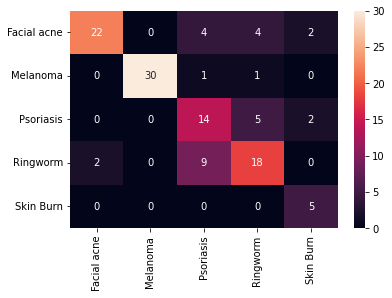

In [128]:
seaborn.heatmap(confusion_matrix_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
# seaborn.heatmap(confusion_matrix_data,annot=True)

In [129]:
printClassList()

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm
4 -->  Skin Burn


In [130]:
classification_report_data=classification_report(predicted_values,Testing_Labels,target_names=classes_list)

In [131]:
print(classification_report_data)

              precision    recall  f1-score   support

 Facial acne       0.92      0.69      0.79        32
    Melanoma       1.00      0.94      0.97        32
   Psoriasis       0.50      0.67      0.57        21
    Ringworm       0.64      0.62      0.63        29
   Skin Burn       0.56      1.00      0.71         5

    accuracy                           0.75       119
   macro avg       0.72      0.78      0.73       119
weighted avg       0.78      0.75      0.76       119



## Complex Architecture 1

In [61]:
model2_using_Complex_architecture=keras.models.Sequential(
     [
         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[180,180,1]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Conv2D(filters=16,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[180,180,1]),
         keras.layers.MaxPool2D(pool_size=(2,2)),
         keras.layers.Flatten(),
         keras.layers.Dense(units=512,activation='relu'),
         keras.layers.Dense(units=256,activation='relu'),
         keras.layers.Dense(units=64,activation='relu'),
         keras.layers.Dense(units=5,activation='softmax'),
     ]
 )

In [62]:
model2_using_Complex_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 178, 178, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 87, 87, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 43, 43, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 29584)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               15147520  
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [63]:
model2_using_Complex_architecture.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [65]:
history2=model2_using_Complex_architecture.fit(Training_Features,numpy.array(Training_Labels),epochs=10,verbose=1,validation_data=(Testing_Features,numpy.array(Testing_Labels)))  

Epoch 1/10
21/21 [==============================] - 16s 777ms/step - loss: 0.2032 - accuracy: 0.9284 - val_loss: 1.2224 - val_accuracy: 0.7479
Epoch 2/10
21/21 [==============================] - 16s 771ms/step - loss: 0.1110 - accuracy: 0.9680 - val_loss: 1.6963 - val_accuracy: 0.7311
Epoch 3/10
21/21 [==============================] - 17s 799ms/step - loss: 0.1073 - accuracy: 0.9680 - val_loss: 1.3180 - val_accuracy: 0.7479
Epoch 4/10
21/21 [==============================] - 17s 787ms/step - loss: 0.1733 - accuracy: 0.9436 - val_loss: 1.0165 - val_accuracy: 0.7311
Epoch 5/10
21/21 [==============================] - 16s 779ms/step - loss: 0.1256 - accuracy: 0.9573 - val_loss: 1.9277 - val_accuracy: 0.6555
Epoch 6/10
21/21 [==============================] - 16s 779ms/step - loss: 0.0924 - accuracy: 0.9680 - val_loss: 1.5895 - val_accuracy: 0.7227
Epoch 7/10
21/21 [==============================] - 16s 782ms/step - loss: 0.0602 - accuracy: 0.9802 - val_loss: 1.5146 - val_accuracy: 0.7143

In [71]:
# model2_using_Complex_architecture.save('./Models/model1_using_Complex_architecture.h5')

In [72]:
model2_using_Complex_architecture

In [132]:
# trained_model=tensorflow.keras.models.load_model('./Models/model1_using_Complex_architecture.h5')
trained_model=model2_using_Complex_architecture

In [133]:
Predeicted_test_data=trained_model.predict(Testing_Features)

In [134]:
Predeicted_test_data

array([[1.82828032e-07, 8.94143595e-05, 9.98929679e-01, 5.14798856e-04,
        4.65827296e-04],
       [9.97670114e-01, 4.32243607e-12, 1.13358709e-08, 2.32984731e-03,
        4.11408164e-11],
       [3.43539490e-04, 7.86728633e-05, 1.90826114e-02, 9.80410635e-01,
        8.46004623e-05],
       [9.96747851e-01, 3.63517708e-14, 2.43739495e-09, 3.25214351e-03,
        1.48902175e-11],
       [6.32501543e-01, 1.75594432e-05, 8.09277262e-05, 3.67382824e-01,
        1.71368192e-05],
       [2.15200731e-03, 4.62566675e-07, 2.50138837e-05, 9.97803509e-01,
        1.89828497e-05],
       [1.43929180e-08, 8.20897981e-08, 9.92305458e-01, 7.66476151e-03,
        2.96916714e-05],
       [9.97698843e-01, 5.92415672e-10, 5.87274087e-07, 2.30058841e-03,
        1.85525302e-08],
       [1.32135552e-22, 9.97422576e-01, 1.80067704e-03, 7.18034085e-13,
        7.76833040e-04],
       [2.45876927e-05, 9.99822080e-01, 1.53355242e-04, 2.61612017e-11,
        2.97929403e-10],
       [5.92637939e-08, 1.5194

In [135]:
predicted_values=[numpy.argmax(result) for result in Predeicted_test_data]

In [136]:
for i in range(len(predicted_values)):
    print(predicted_values[i]," - > ",Testing_Labels[i])

2  - >  3
0  - >  4
3  - >  3
0  - >  2
0  - >  0
3  - >  3
2  - >  2
0  - >  0
1  - >  1
1  - >  1
3  - >  3
0  - >  0
0  - >  0
0  - >  0
0  - >  2
1  - >  1
0  - >  2
3  - >  3
2  - >  2
1  - >  2
0  - >  0
1  - >  1
3  - >  2
1  - >  1
0  - >  0
1  - >  1
2  - >  2
0  - >  0
0  - >  0
1  - >  1
1  - >  1
3  - >  3
2  - >  2
1  - >  1
3  - >  3
3  - >  4
4  - >  4
3  - >  3
2  - >  2
3  - >  3
3  - >  2
1  - >  1
0  - >  3
1  - >  1
1  - >  1
4  - >  2
0  - >  4
1  - >  1
2  - >  2
3  - >  3
1  - >  1
2  - >  2
2  - >  2
3  - >  3
1  - >  1
4  - >  4
1  - >  1
1  - >  1
0  - >  2
1  - >  3
3  - >  3
0  - >  2
4  - >  4
3  - >  3
0  - >  0
0  - >  0
0  - >  3
3  - >  3
3  - >  0
0  - >  0
1  - >  1
0  - >  2
3  - >  3
1  - >  1
3  - >  2
0  - >  0
1  - >  1
1  - >  1
3  - >  2
3  - >  3
1  - >  1
3  - >  3
1  - >  1
0  - >  0
0  - >  3
1  - >  1
1  - >  1
0  - >  0
1  - >  3
0  - >  0
1  - >  1
0  - >  0
0  - >  0
4  - >  1
0  - >  0
0  - >  0
0  - >  0
3  - >  2
3  - >  2
4  - >  4


In [137]:
pyplot.figure('Confusion Matrix')
confusion_matrix_data=confusion_matrix(predicted_values,Testing_Labels)

<Figure size 432x288 with 0 Axes>

In [138]:
confusion_matrix_data

array([[23,  0,  8,  3,  2],
       [ 0, 29,  1,  2,  0],
       [ 0,  0,  9,  1,  0],
       [ 1,  0,  9, 22,  2],
       [ 0,  1,  1,  0,  5]], dtype=int64)

<AxesSubplot:>

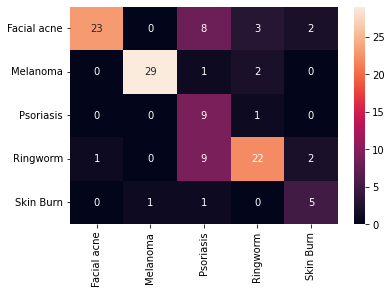

In [139]:
seaborn.heatmap(confusion_matrix_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
# seaborn.heatmap(confusion_matrix_data,annot=True)

In [140]:
printClassList()

0 -->  Facial acne
1 -->  Melanoma
2 -->  Psoriasis
3 -->  Ringworm
4 -->  Skin Burn


In [141]:
classification_report_data=classification_report(predicted_values,Testing_Labels,target_names=classes_list)

In [142]:
print(classification_report_data)

              precision    recall  f1-score   support

 Facial acne       0.96      0.64      0.77        36
    Melanoma       0.97      0.91      0.94        32
   Psoriasis       0.32      0.90      0.47        10
    Ringworm       0.79      0.65      0.71        34
   Skin Burn       0.56      0.71      0.63         7

    accuracy                           0.74       119
   macro avg       0.72      0.76      0.70       119
weighted avg       0.83      0.74      0.76       119

